In [2]:
import altair as alt
import pandas as pd
print(alt.__version__)

4.0.0


In [8]:
data = pd.read_csv('./Pats_penalty_plays_2009_2019.csv')

In [9]:
data['season']=data['season'].astype(str)

In [10]:
#Crear columna para categoría de ganador
data["game_winner_cat"]=data["winner"].apply(lambda x: 'NE' if x =='NE' else 'Oponente')


In [11]:
data[:6]

,season,home,away,week,score_home,score_away,winner,loser,team_possesion,field_position,...,team_possesion_cat,team_penalty_cat,penalty_side,opportunity,yards_to_go,week_type,one_posession_game,pats_points,opps_points,game_winner_cat
0,2009,NE,BUF,1,25,24,NE,BUF,BUF,BUF 43,...,Oponente,Oponente,Castigo Ofensivo,3.0,7.0,1,Juego de una posesión,25,24,NE
1,2009,NE,BUF,1,25,24,NE,BUF,NE,NE 30,...,NE,NE,Castigo Ofensivo,2.0,8.0,1,Juego de una posesión,25,24,NE
2,2009,NE,BUF,1,25,24,NE,BUF,NE,NE 45,...,NE,Oponente,Castigo Defensivo,1.0,10.0,1,Juego de una posesión,25,24,NE
3,2009,NE,BUF,1,25,24,NE,BUF,BUF,BUF 48,...,Oponente,NE,Castigo Defensivo,1.0,10.0,1,Juego de una posesión,25,24,NE
4,2009,NE,BUF,1,25,24,NE,BUF,BUF,NE 43,...,Oponente,Oponente,Castigo Ofensivo,2.0,1.0,1,Juego de una posesión,25,24,NE
5,2009,NE,BUF,1,25,24,NE,BUF,NE,NE 26,...,NE,Oponente,Castigo Defensivo,4.0,16.0,1,Juego de una posesión,25,24,NE


In [12]:
df_yds_totales_week = data.groupby(["game_winner_cat","team_penalty_cat","penalty_side",\
                               "season","week"])["penalty_yards"].sum().reset_index(name="sum_yds")


In [13]:
df_yds_totales = df_yds_totales_week.groupby(["game_winner_cat","team_penalty_cat", \
                                              "penalty_side"])["sum_yds"].mean().round(1).reset_index(name="mean_yds")


df_yds_totales[:4]

,game_winner_cat,team_penalty_cat,penalty_side,mean_yds
0,NE,NE,Castigo Defensivo,28.7
1,NE,NE,Castigo Ofensivo,28.4
2,NE,Oponente,Castigo Defensivo,34.5
3,NE,Oponente,Castigo Ofensivo,26.3


### Vamos a crear un Altair Theme para darle formato a todas las gráficas

In [14]:
def theme_pats_white():
    # Typography
    font = "Courier",
    labelFont = "Courier" 
    sourceFont = "Courier"
    fontColor = "#08415C"    #Blue Pats
    
    # Axes
    axisColor = "#000000"
    gridColor = "#DEDDDD"
    
    # Colors
    main_palette = ["#08415C", 
                    "#B0B7BC",
                   ]
    
    return{        
        'config':{            
            "title": {
                "fontSize": 22,
                "font": font,
                "anchor": "middle", # equivalent of left-aligned.                
                "color": fontColor,
            },
            "axisX": {
                "labelFont": labelFont,
                "titleFont": font,
                "titleFontSize": 12,
                "titleColor" : fontColor,
                "titleFontSize": 18,
                "grid": False,
                
            },
            "axisY": {
                "axis":None,
                "labelFont": labelFont,
                "labelFontSize": 12,
                "titleFont": font,
                "titleColor" : fontColor,
                "titleFontSize": 16,
                "grid": False,
                "ticks": False,
                "labels":False,
                
            },
            "legend": {
                "labelFont": labelFont,
                "labelFontSize": 12,
                "titleFont": font,
                "titleFontSize": 12,
                #"titleColor" : fontColor,
                "orient": "top",
                "title": None,
                #"labelAlign":"center",
            },
            "range": {
                "category": main_palette,             
            },
            "view": {
                "stroke": "transparent", # altair uses gridlines to box the area
                                         #where the data is visualized. This takes that off.
            },
            "facet":{
              "spacing":20,  
            },
            "header":{
              "labelColor": fontColor,  
              #"labelFont": labelFont,
              "labelSize" : 10
            },

        }
    }


alt.themes.register('my_custom_theme', theme_pats_white)
alt.themes.enable('my_custom_theme')

ThemeRegistry.enable('my_custom_theme')

########################################
#### VER YARDAS TOTALES POR CASTIGO, DEFENSIVO Y OFENSIVO,
#### A FAVOR Y EN CONTRA
########################################


In [15]:
source = "@nerudista"

caption_chart = alt.Chart(df_yds_totales).mark_text(
    text = source, color="#08415C", 
    font="Courier",
    dx = 340,
    size = 10,
    dy = 5).properties(
    height = 20,
    width = 700,
)


caption_chart

alt.Chart(...)

In [16]:
from altair.expr import datum, if_

bar = alt.Chart(df_yds_totales[df_yds_totales["penalty_side"]=='Castigo Defensivo']).mark_bar().transform_calculate(
    Genus='indexof(["NE"], datum.game_winner_cat) >= 0 ? "Cuando los Pats Ganan": "Cuando los Pats Pierden"'
).encode(
    x=alt.X('team_penalty_cat:N', title='', axis=None),
    y=alt.Y('mean(mean_yds):Q', title='Promedio de Yardas\nConcedidas por Partido'),    
    color='team_penalty_cat:N'
)
text = bar.mark_text(dx=0 ,dy=-8, fontSize=12, font="Courier", color="#08415C").encode(
    text = alt.Text( "mean(mean_yds):Q" , format=".1f",),   #redondear decimales en el label
    opacity=alt.value(0.9),
    #color="#08415C"
    
)

base_castigos_defensivos= alt.layer(bar, text).properties(
    #title="Castigos Defensivos por Equipo",   #va a este nivel porque es una facet chart
    width = 180,
    height = 200,
).facet(
    #column='game_winner_cat:N',        
    #column='Genus:N'
    column = alt.Column("Genus:N", title = "top 5 countries of origin, 2016", sort = "descending",),
).configure_header(    
    title=None,
    labelOrient="bottom",  #Posición del "Cuando los Pats ganan",
    labelFontSize = 12,
)

base_castigos_defensivos


alt.FacetChart(...)

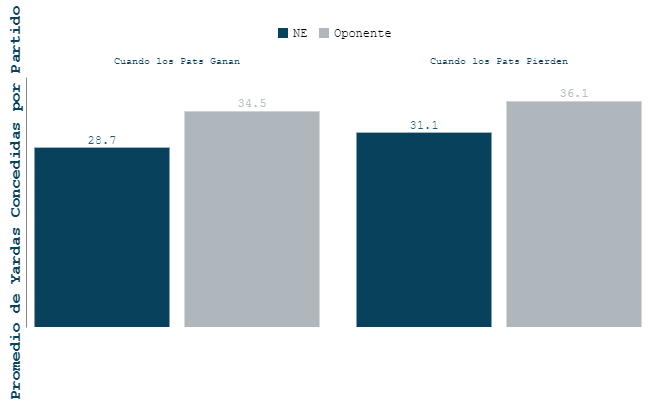

In [594]:
#segundo intento defensivos
from altair.expr import datum, if_

bar = alt.Chart(df_yds_totales[df_yds_totales["penalty_side"]=='Castigo Defensivo']).mark_bar().transform_calculate(
    Genus='indexof(["NE"], datum.game_winner_cat) >= 0 ? "Cuando los Pats Ganan": "Cuando los Pats Pierden"'
).encode(
    x=alt.X('team_penalty_cat:N', title='', axis=None),
    y=alt.Y('mean(mean_yds):Q', title='Promedio de Yardas\nConcedidas por Partido'),    
    color=alt.Color('team_penalty_cat:N' , 
                    legend=alt.Legend(direction="horizontal",orient="none",legendX=250, legendY=-50))
)
text = bar.mark_text(dx=0 ,dy=-8, fontSize=12, font="Courier", color="#08415C").encode(
    text = alt.Text( "mean(mean_yds):Q" , format=".1f",),   #redondear decimales en el label
    opacity=alt.value(0.9),
)

base_castigos_defensivos_2= alt.layer(bar, text).properties(
    width = 300,
    height = 250,
).facet(
    column = alt.Column("Genus:N", title=""),
)

base_castigos_defensivos_2


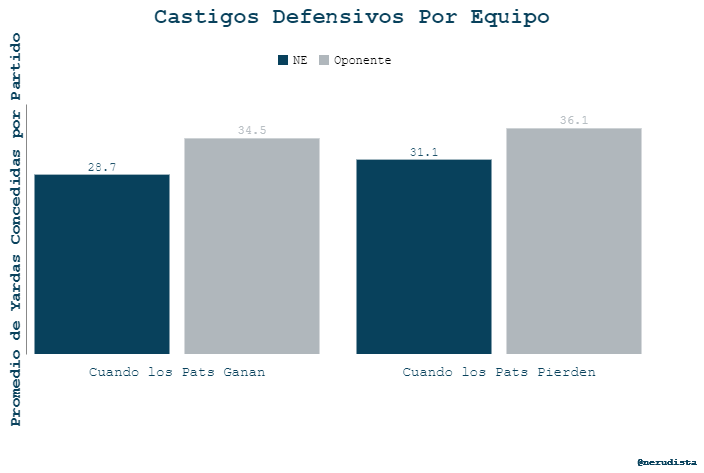

In [610]:

final = alt.vconcat(base_castigos_defensivos_2, caption_chart).configure_header(    
    #El configure header va aquí para evitar errores de config
    title=None,
    labelOrient="bottom",  #Posición del "Cuando los Pats ganan",
    labelFontSize = 14,    #Tamaño del "Cuando los Pats ganan",
).properties(
 title = "Castigos Defensivos Por Equipo"
)
#final.configure_legend(symbolSize = 200, labelLimit = 200 )
final



In [613]:
#Guardar imagen
final.save('./graficas/Altair/AltairCastigosDefensivos.png', scale_factor=2.0)

**Castigos Ofensivos**

In [17]:
#primer intento ofensivos
from altair.expr import datum, if_

barOf = alt.Chart(df_yds_totales).transform_filter(
    "datum.penalty_side == 'Castigo Ofensivo'"
  ).transform_calculate(
    Genus='indexof(["NE"], datum.game_winner_cat) >= 0 ? "Cuando los Pats Ganan": "Cuando los Pats Pierden"'
).mark_bar().encode(
    x=alt.X('team_penalty_cat:N', title='', axis=None),
    y=alt.Y('mean(mean_yds):Q', title='Promedio de Yardas\nConcedidas por Partido'),    
    color=alt.Color('team_penalty_cat:N' , 
                    legend=alt.Legend(direction="horizontal",orient="none",legendX=250, legendY=-50))
)


textOf = barOf.mark_text(dx=0 ,dy=-8, fontSize=12, font="Courier", color="#08415C").encode(
    text = alt.Text( "mean(mean_yds):Q" , format=".1f",),   #redondear decimales en el label
    opacity=alt.value(0.9),
)

base_castigos_ofensivos= alt.layer(barOf, textOf).properties(
    width = 300,
    height = 250,
).facet(
    column = alt.Column("Genus:N", title=""),
)

base_castigos_ofensivos


alt.FacetChart(...)

In [30]:
finalOf = alt.vconcat(base_castigos_ofensivos, caption_chart).configure_header(    
    #El configure header va aquí para evitar errores de config
    title=None,
    labelOrient="bottom",  #Posición del "Cuando los Pats ganan",
    labelFontSize = 14,    #Tamaño del "Cuando los Pats ganan",
    labelFont="Courier",
    
).properties(
 title = "Castigos Ofensivos Por Equipo - Altair",
)

finalOf = finalOf.configure_title(
    anchor='start'
)

finalOf

alt.VConcatChart(...)

In [31]:
#Guardar imagen
finalOf.save('./graficas/Altair/AltairCastigosOfensivos.png', scale_factor=1.0)

########################################
###   CHECK PENALTIES BY OPPORTUNITY
########################################


In [38]:
df_opp = data.groupby(["opportunity","team_penalty_cat"])["penalty_yards"].sum().reset_index(name="count_yds")
df_opp.opportunity = df_opp.opportunity.astype(int)

In [55]:

bars_opp = alt.Chart(df_opp).mark_bar().encode(
    x=alt.X('count_yds:Q', stack='zero',axis=None),
    y = alt.Y ("opportunity:N" , 
           axis=alt.Axis(labels=True, title="Oportunidad")),
    color=alt.Color('team_penalty_cat' , 
                    legend=alt.Legend(direction="horizontal",
                                      orient="none",
                                      legendX=250,
                                      legendY=-40,
                                      columnPadding=30,
                                      padding=-25,
                                     ))
).properties(
  width = 700,
  height = 300,
)

text_opp = alt.Chart(df_opp).mark_text(dx=-25, dy=3, color='white', font="Courier",
    fontSize=12,).encode(
    x=alt.X('count_yds:Q', stack='zero',axis=None),
    y=alt.Y('opportunity:N', sort=alt.EncodingSortField(field="opportunity",
                                                        #op="argmax",
                                                        order='ascending')),
    detail='team_penalty_cat:N',
    text=alt.Text('count_yds:Q')
).properties(
  width = 600,
  height = 300,
)

base_opp = alt.layer(bars_opp,text_opp)

In [51]:
base_opp = alt.vconcat(base_opp, caption_chart).configure_header(    
    #El configure header va aquí para evitar errores de config
    title=None,
    labelOrient="bottom",  #Posición del "Cuando los Pats ganan",
    labelFontSize = 14,    #Tamaño del "Cuando los Pats ganan",
).properties(
 title = "Yardas Concedidas\nPor Equipo y Oportunidad - Altair",
)
#final.configure_legend(symbolSize = 200, labelLimit = 200 )
base_opp

alt.VConcatChart(...)

In [56]:
subtitle = alt.Chart(
    {"values": [{"text": "Incluye Castigos Ofensivos y Defensivos"}]}
).mark_text(dx=-165 ,size=16, color="#08415C", font='Courier').encode(
    text="text:N"
).properties(
   width = 700,
    height=0
)

subtitle

alt.Chart(...)

In [64]:
final_opp= alt.vconcat(#title, 
             subtitle,
             base_opp,
             caption_chart).properties(
   title="Yardas Concedidas por Equipo y Oportunidad - Altair"  )

final_opp

alt.VConcatChart(...)

In [65]:
#Guardar imagen
final_opp.save('./graficas/Altair/AltairYardasOportunidad.png', scale_factor=2.0)

########################################
###   CHECK PENALTIES IN LAST 5 MIN IN 4Q
########################################

In [66]:
from datetime import datetime
#Create column for minute:second in time left
#Esta función pone los minutos como horas y los segundos como minutos. 
#Voy a quedarme sólo con los minutos para ver si son los 5 finales
data["mytime"]=pd.to_datetime(data["time_left_qtr"]).dt.hour
data["mytime"]

0       12.0
1       11.0
2        9.0
3        5.0
4        5.0
        ... 
2294     2.0
2295     7.0
2296     4.0
2297     NaN
2298     6.0
Name: mytime, Length: 2299, dtype: float64

In [67]:
df_4q_5min_reg =data[(data.mytime-5 < 0)  & 
     (data.quarter == 'Q4') &
     (data.game_type=='REG') &
     (data.team_penalty_cat != 'NE')].groupby(["week"])["week"].count().reset_index(name="count")

In [72]:
#plot_4q_5min_reg
bar_5min_reg =alt.Chart(df_4q_5min_reg).mark_bar(color="#B0B7BC").encode(
  x=alt.X("week:N", 
          title="Semana",
          axis=alt.Axis(ticks=False, labelAngle = 0),  #pone los número de semana sin voltear
          ),
  y=alt.Y("count:Q", title="Número de castigos")
).properties(
   width = 700,
   height=300
)

text_5min_reg = alt.Chart(df_4q_5min_reg).mark_text(
     
    dy=20, 
    font="Courier",
    fontSize=12,
    color='red').encode(
    x=alt.X('week:N'),
    y=alt.Y('count:Q',axis=None),
    text=alt.Text('count:Q')
)

rule = alt.Chart(df_4q_5min_reg).mark_rule(strokeDash=[8,10],color='red').encode(
    y= alt.Y('mean(count):Q'),
     size=alt.value(1.5),    
      
)

base_5min_reg = alt.layer(bar_5min_reg , text_5min_reg , rule).properties(
width = 700,
    height=400
)
base_5min_reg

alt.LayerChart(...)

In [73]:
title = alt.Chart(
    {"values": [{"text": "Castigos de Contarios en los 5 Minutos Finales"}]}
).mark_text(size=20, color="#08415C", font='Courier').encode(
    text="text:N"
).properties(
width = 400,
    height=5
)

subtitle = alt.Chart(
    {"values": [{"text": "Partidos de Temporada Regular"}]}
).mark_text(size=16, color="#08415C", font='Courier').encode(
    text="text:N"
).properties(
width = 400,
    height=10
)

In [74]:
final_5min_reg= alt.vconcat(#title, 
             subtitle,
             base_5min_reg,
             caption_chart).properties(
   title="Castigos de Contrarios en los 5 min Finales - Altair"  )

final_5min_reg

alt.VConcatChart(...)

In [75]:
#Guardar imagen
final_5min_reg.save('./graficas/Altair/AltairCastigoPorSemanasReg.png', scale_factor=1.0)

########## CASTIGOS POST-TEMPORADA 

In [76]:
def corregir_semana_sb(df):
    if df.game_type == 'POST':
        if df.week == 1:
            return "Wildcard"
        elif df.week == 2:
            return "Ronda Divisional"
        elif df.week == 3:
            return "Ronda Campeonato"
        else:
            return "Super Tazón"

data["myweek"]=data.apply(corregir_semana_sb,axis=1)

In [77]:
df_4q_5min_post =data[(data.mytime-5 < 0)  & 
     (data.quarter == 'Q4') &
     (data.game_type=='POST') &
     (data.team_penalty_cat != 'NE')].groupby(["myweek","penalty_side"])["myweek"].count().reset_index(name="count_pen")

df_4q_5min_post

,myweek,penalty_side,count_pen
0,Ronda Campeonato,Castigo Defensivo,1
1,Ronda Campeonato,Castigo Ofensivo,1
2,Ronda Divisional,Castigo Defensivo,2
3,Ronda Divisional,Castigo Ofensivo,3
4,Super Tazón,Castigo Defensivo,3
5,Super Tazón,Castigo Ofensivo,1
6,Wildcard,Castigo Ofensivo,1


In [78]:

bar_5min_post = alt.Chart(df_4q_5min_post).mark_bar().encode(
   x =alt.X("myweek:N",
             sort=['Wildcard', 'Ronda Divisional', 'Ronda Campeonato','Super Tazón'],
             title="Semana",
            axis=alt.Axis(labelAngle=0 , ticks=False), 
           ),
    y=alt.Y("count_pen:Q", stack='zero', axis=None),    
    color=alt.Color('penalty_side',                  
                   legend=alt.Legend(direction="horizontal",
                                      orient="none",
                                      legendX=250,
                                      legendY=0,
                                      columnPadding=30,
                                      padding=-25,) 
                   )
).properties(
width= 700,
height=300)

text_5min_post = alt.Chart(df_4q_5min_post).mark_text(
    font="Courier",
    fontSize=15,
    dy=30, 
    color='white'
).encode(
     x =alt.X("myweek:N",
              sort=['Wildcard', 'Ronda Divisional', 'Ronda Campeonato','Super Tazón'],
              axis=None),
     y=alt.Y("count_pen:Q", stack='zero',axis=None),    
     detail='penalty_side:N',
     text=alt.Text('count_pen:Q' )
).properties(
width= 700,
height=300)


base_5min_post= alt.layer( bar_5min_post,text_5min_post )
base_5min_post

alt.LayerChart(...)

In [79]:
subtitle = alt.Chart(
    {"values": [{"text": "Partidos de Postemporada"}]}
).mark_text(dx=-165 ,size=16, color="#08415C", font='Courier').encode(
    text="text:N"
).properties(
   width = 700,
    height=0
)

subtitle

alt.Chart(...)

In [80]:
final_5min_post= alt.vconcat( 
             subtitle,
             base_5min_post,
             caption_chart).properties(
   title="Castigos de Contrarios en los 5 min Finales - Altair"  )

#Guardar imagen
final_5min_post.save('./graficas/Altair/AltairCastigoPorSemanasPost.png', scale_factor=1.0)

final_5min_post

alt.VConcatChart(...)

########################################
  ### VER CASTIGOS EN JUEGOS DE UNA POSESION
  ### 
  ########################################

In [81]:
pre_df_juegos_posesion = data.groupby(["game_winner_cat","team_penalty_cat","season","week","quarter","one_posession_game"])["game_winner_cat"].count().reset_index(name="cnt_pen")
pre_df_juegos_posesion[:6]

,game_winner_cat,team_penalty_cat,season,week,quarter,one_posession_game,cnt_pen
0,NE,NE,2009,1,Q1,Juego de una posesión,2
1,NE,NE,2009,1,Q2,Juego de una posesión,2
2,NE,NE,2009,1,Q3,Juego de una posesión,1
3,NE,NE,2009,1,Q4,Juego de una posesión,1
4,NE,NE,2009,3,Q1,Juego de varias posesiones,1
5,NE,NE,2009,3,Q2,Juego de varias posesiones,1


In [82]:
df_juegos_posesion= pre_df_juegos_posesion.groupby(["game_winner_cat","team_penalty_cat","quarter","one_posession_game"])["cnt_pen"].mean().round(2).reset_index(name="mean_pen")
df_juegos_posesion.game_winner_cat=df_juegos_posesion.game_winner_cat.apply(lambda x : 'Cuando Pats ganan' if x=="NE" else 'Cuando Pats Pierden' )
df_juegos_posesion.team_penalty_cat=df_juegos_posesion.team_penalty_cat.apply(lambda x : 'Castigo de NE' if x=="NE" else 'Castigo de Oponente' )
df_juegos_posesion[:3]

,game_winner_cat,team_penalty_cat,quarter,one_posession_game,mean_pen
0,Cuando Pats ganan,Castigo de NE,Q1,Juego de una posesión,1.56
1,Cuando Pats ganan,Castigo de NE,Q1,Juego de varias posesiones,1.60
2,Cuando Pats ganan,Castigo de NE,Q2,Juego de una posesión,2.31


In [88]:
domain = ['Q1', 'Q2', 'Q3','Q4']
range_ = ["#a8bdc6","#8ea8b4","#4b7488","#08415C"]

bar_juegos_1_posesion = alt.Chart(df_juegos_posesion[(df_juegos_posesion.one_posession_game=='Juego de una posesión' ) & \
                              (df_juegos_posesion.quarter !='Q5' )]).mark_bar(
    
).encode(
    x = alt.X(alt.repeat("column"),
              type='ordinal',              
              axis=None),
    y = alt.Y(alt.repeat("row"), type='quantitative', axis=None),
    column="game_winner_cat",
    row="team_penalty_cat",
    color=alt.Color('quarter', scale=alt.Scale(domain=domain, range=range_),
                    legend=None),
).properties(
    width = 300
).repeat(
     row=['mean_pen'],
     column=['quarter'],
     title="Promedio de Castigos por Quarter - Altair"
).configure_header(
    title=None,
    labelFont="Courier",
    labelFontSize=13,
    labelAlign="center",
    labelColor="#08415C",

)

#Guardar imagen
bar_juegos_1_posesion.save('./graficas/Altair/AltairJuegosUnaPosesionBar.png', scale_factor=1.0)

bar_juegos_1_posesion

In [89]:

text_juegos_1_posesion = alt.Chart(df_juegos_posesion[(df_juegos_posesion.one_posession_game=='Juego de una posesión' ) & \
                              (df_juegos_posesion.quarter !='Q5' )]).mark_text(
    font="Courier",
    fontSize =12,
    
).encode(
    x = alt.X(alt.repeat("column"),
              type='ordinal',              
              axis=None),
    y = alt.Y(alt.repeat("row"), type='quantitative', axis=None),
    column="game_winner_cat",
    row="team_penalty_cat",
    text= alt.Text("mean_pen:Q")
).properties(
    width = 300
).repeat(
     row=['mean_pen'],
     column=['quarter'],
)

text_juegos_1_posesion.save('./graficas/Altair/AltairJuegosUnaPosesionText.png', scale_factor=1.0)

text_juegos_1_posesion

alt.RepeatChart(...)

In [85]:
bar_juegos_1_posesion + text_juegos_1_posesion

ValueError: Objects with "config" attribute cannot be used within LayerChart. Consider defining the config attribute in the LayerChart object instead.


  ########################################
  ### VER CASTIGOS POR TEMPORADA, OFENSIVOS Y DEFENSIVOS
  ### HECHOS POR OPONENTES
  ########################################

In [33]:
df_temporada_help = data.groupby(["season","week","team_penalty_cat","penalty_side","game_type"]).agg(\
                                                                              pats_points_game = ('pats_points','mean'),
                                                                              opp_points_game = ('opps_points','mean'),
                                                                              cnt_pen_game = ('opps_points','count'),                                                                                                          
                                     ).reset_index().groupby(["season","penalty_side","team_penalty_cat"]).agg(\
                                                                                                          sum_pen_season = ('cnt_pen_game','sum'),
                                                                                                          opp_points_season= ('opp_points_game','sum')
                                                                                                  ).reset_index()

df_temporada_help[:3]
df_temporada_help.dtypes

season               object
penalty_side         object
team_penalty_cat     object
sum_pen_season        int64
opp_points_season     int64
dtype: object

In [36]:
range_=["#C8032B","#08415C"]
domain=["Castigo Defensivo","Castigo Ofensivo"]
scatter_temporada_help_2 =alt.Chart(df_temporada_help).transform_filter(    
    "datum.team_penalty_cat == 'Oponente'"
).mark_circle().encode(
 x=alt.X("sum_pen_season:Q",
         scale=alt.Scale(zero=False,
                         bins = [30,40,50,60,70,80],) ,
         axis = alt.Axis(labels=True, ticks=False)
        ),
 y=alt.Y("opp_points_season:Q",title="Puntos",         
         scale=alt.Scale(zero=False,
                         domain=(160,400),
                         bins = [100,200,300,400]),
         
         axis = alt.Axis(labels=True, ticks=False),         
         ),
 color= alt.Color("penalty_side",
                  scale=alt.Scale(domain=domain, range=range_),
                  legend=alt.Legend(direction="horizontal",
                                      orient="none",
                                      legendX=250,
                                      legendY=0,
                                      columnPadding=30,
                                      padding=-25,
                                   )
                  ),
 size= alt.Size('sum_pen_season', legend=None,bin=True),
).properties(
    width = 700,
    height= 400
)


scatter_reg_temorada_help = scatter_temporada_help_2 + scatter_temporada_help_2.transform_regression(
    on='sum_pen_season',regression ='opp_points_season', method="linear" , groupby=['penalty_side']
).mark_line(size = 4)

text_temporada_help = alt.Chart(df_temporada_help[df_temporada_help.team_penalty_cat == 'Oponente']).mark_text(
    align='left',
    baseline='middle',
    dx=10,
    size=10,
    #color="red",    
    font="Courier"
).encode(
    x=alt.X("sum_pen_season:Q", title="Castigos"),
 y=alt.Y("opp_points_season:Q",title="Puntos"),
    text='season',
    color= alt.Color("penalty_side:N",
                  #scale=alt.Scale(domain=domain, range=range_),                  
                  ),
)


base_temporada_help =alt.layer(scatter_reg_temorada_help , text_temporada_help)
base_temporada_help

alt.LayerChart(...)

In [108]:
subtitle = alt.Chart(
    {"values": [{"text": "Totales por Temporada"}]}
).mark_text(dx=-165 ,size=16, color="#08415C", font='Courier').encode(
    text="text:N"
).properties(
   width = 700,
    height=10
)

subtitle

alt.Chart(...)

In [37]:
final_temporada_help= alt.vconcat( 
             #subtitle,
             base_temporada_help,
             caption_chart).properties(
   title="Castigos de Contrarios en los 5 min Finales"  )

#Guardar imagen
#final_temporada_help.save('./graficas/Altair/AltairCastigosVSYardas.png', scale_factor=1.0)

final_temporada_help

alt.VConcatChart(...)

########################################
  ### VER CASTIGOS POR TEMPORADA, OFENSIVOS Y DEFENSIVOS
  ### HECHOS POR TODOS
  ########################################

In [136]:
df_temporada_help = data.groupby(["season","week","team_penalty_cat","penalty_side","game_type"]).agg(\
                                                                              pats_points_game = ('pats_points','mean'),
                                                                              opp_points_game = ('opps_points','mean'),
                                                                              cnt_pen_game = ('opps_points','count'),                                                                                                          
                                     ).reset_index().groupby(["season","penalty_side","team_penalty_cat"]).agg(\
                                                                                                          sum_pen_season = ('cnt_pen_game','sum'),
                                                                                                          opp_points_season= ('opp_points_game','sum')
                                                                                                  ).reset_index()

df_temporada_help[:3]
df_temporada_help.dtypes

season               object
penalty_side         object
team_penalty_cat     object
sum_pen_season        int64
opp_points_season     int64
dtype: object

In [148]:
#Crear columna para unir el tipo de castigo y quién lo hizo
df_temporada_help["cat_made"]=df_temporada_help["team_penalty_cat"]+' '+df_temporada_help["penalty_side"]
df_temporada_help[:3]


,season,penalty_side,team_penalty_cat,sum_pen_season,opp_points_season,cat_made
0,2009,Castigo Defensivo,NE,30,256,NE Castigo Defensivo
1,2009,Castigo Defensivo,Oponente,50,276,Oponente Castigo Defensivo
2,2009,Castigo Ofensivo,NE,57,280,NE Castigo Ofensivo


In [198]:
domain=["NE Castigo Defensivo","NE Castigo Ofensivo","Oponente Castigo Defensivo","Oponente Castigo Ofensivo"]
range_=["#08415C","#a5b9c3","#d23051","#eba3b1"]
#line_temporada_all
base_temporada_all = alt.Chart(df_temporada_help).mark_trail().encode(   #trail y no line para poder cambiar el ancho de la línea
    x = alt.X("season:N",
              title="Temporada",
              axis = alt.Axis(ticks=False, labels=True, labelAngle=0)), 
    y = alt.Y("sum_pen_season:Q",
               title="Total de Castigos",
               axis = alt.Axis(ticks=False, labels=True),
               scale = alt.Scale (zero=False,)
               ),
    color = alt.Color("cat_made:N", 
                      scale = alt.Scale(domain=domain, range=range_),
                      legend= None),
    size= alt.Size("sum_pen_season:Q", legend=None,
                   scale= alt.Scale(domain=[30,100], range=[1,18])
                  )
).properties(
    width = 700,
    height = 400
)


base_temporada_all

alt.Chart(...)

In [199]:
base_temporada_all= alt.vconcat( 
             #subtitle,
             base_temporada_all,
             caption_chart).properties(
   title="Castigos Por Temporada"  )

#Guardar imagen
base_temporada_all.save('./graficas/Altair/AltairCastigosAllSeason.png', scale_factor=1.0)

base_temporada_all

alt.VConcatChart(...)